# İstatistiksel Dağılımlar

### Q1
dağılım = np.random.dağılım_adı([],[]) kodunu kullanarak, dağılım_adı yazan yere seçtiğiniz bir dağılımı ve parantez içinde [] şeklinde gösterilen boşlukları yine kendi seçiminiz doğrultusunda doldurun. Daha sonra, a) Verinin histogramını çiziniz b) Q-Q grafiğini çizip yorumlayınız

### Solution
Burada pareto dagiliminin histogrami cizilmistir ve normal dagilimdan cok farkli bir dagilim oldugu QQ grafiginden de anlasilmaktadir.
#### Not:
Pareto ilkesi (80-20 kuralı, önemli azın yasası ve etken seyrekliliği ilkesi olarak da bilinir), çoğu olay için, etkilerin kabaca %80'inin etkenlerin %20'sinden kaynaklandığını belirtir.
Kaynak: https://tr.wikipedia.org/wiki/Pareto_ilkesi

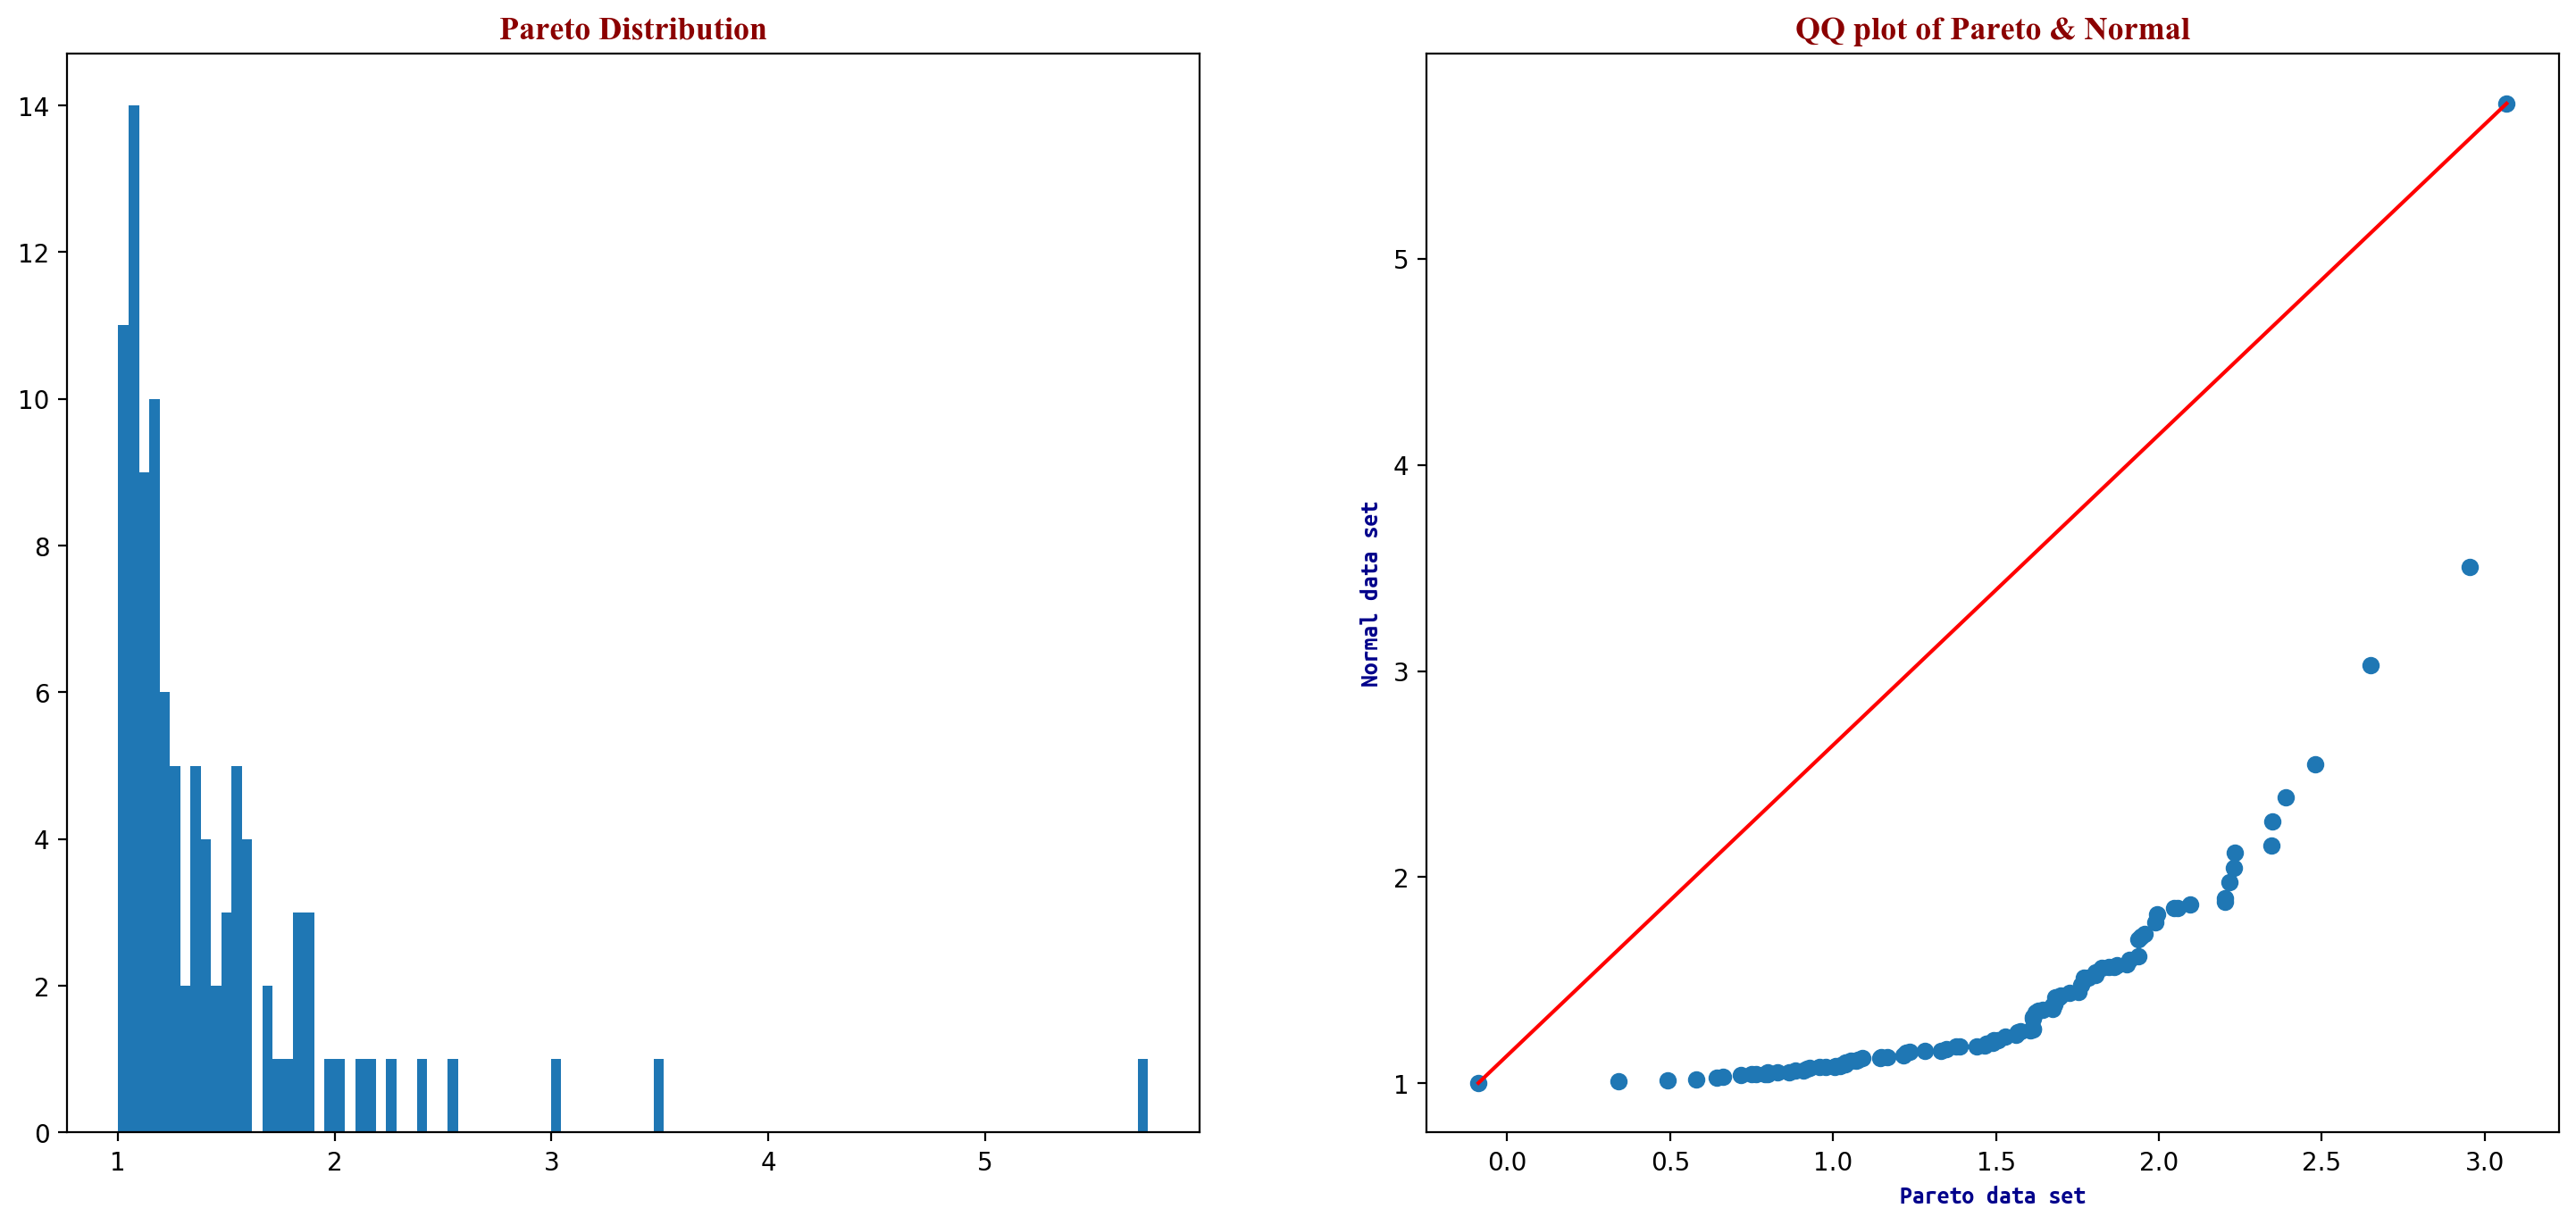

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

# custom font defs
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'ubuntu mono', 'color': 'darkblue','weight': 'bold','size': 10 }


# create a pareto distributed array
pareto = np.random.default_rng().pareto(3.0, 100) + 1
plt.figure(figsize=(18,8), dpi = 200)
plt.subplot(121)
plt.title('Pareto Distribution', fontdict = title_font)
plt.hist(pareto, 100)

# create a normal distributed data from pareto array
normal = np.random.default_rng().normal(np.mean(pareto), np.std(pareto), len(pareto))

# sort the distributions
pareto.sort()
normal.sort()

# plot the graphs
plt.subplot(122)
plt.scatter(normal, pareto)
plt.title('QQ plot of Pareto & Normal', fontdict = title_font)
plt.xlabel('Pareto data set', fontdict = axis_font)
plt.ylabel('Normal data set', fontdict = axis_font)
plt.plot([np.min(normal), np.max(normal)],
         [np.min(pareto), np.max(pareto)], c='red')

plt.show()

### Q2
https://finance.yahoo.com/ sitesini kullanarak google şirketinin 2015-2017 yılları arasında hisse senedi fiyatlarını elde edin. Bu veriyi kullanarak hisse senedi getirisini şu formülle hesaplayın:
Pt−Pt−1/Pt−1
 
(burada  Pt, t zamanındaki hisse senedi fiyatını ve Pt−1 ise t-1 zamanındaki hisse senedi fiyatını vermektedir). Getiriler dağılımı hangi dağılıma daha yakındır?

#### Not:
https://finance.yahoo.com/ adresinden veri şu şekilde çekilir. Verilen adres tıkladıktan sonra arama bölümüne aramak istediğiniz hisse senedinin adını yazın (ör: google). Arama sonucu altta çıkan sonuca tıklayarak ilgili hisse senedine gidiniz. İlgili hisse senedinin bilgilerinin bulunduğu sayfaya geldiğinizde Historical Prices (Geçmiş veriler) sekmesine tıklayın ve ilgili tarih aralığını seçtikten sonra Apply'a tıklayın. Son olarak Download Data butonuna basarak veriyi indirin.

### Solution
Google Getiriler dagilimi normal dagilima cok yakin cikmistir.

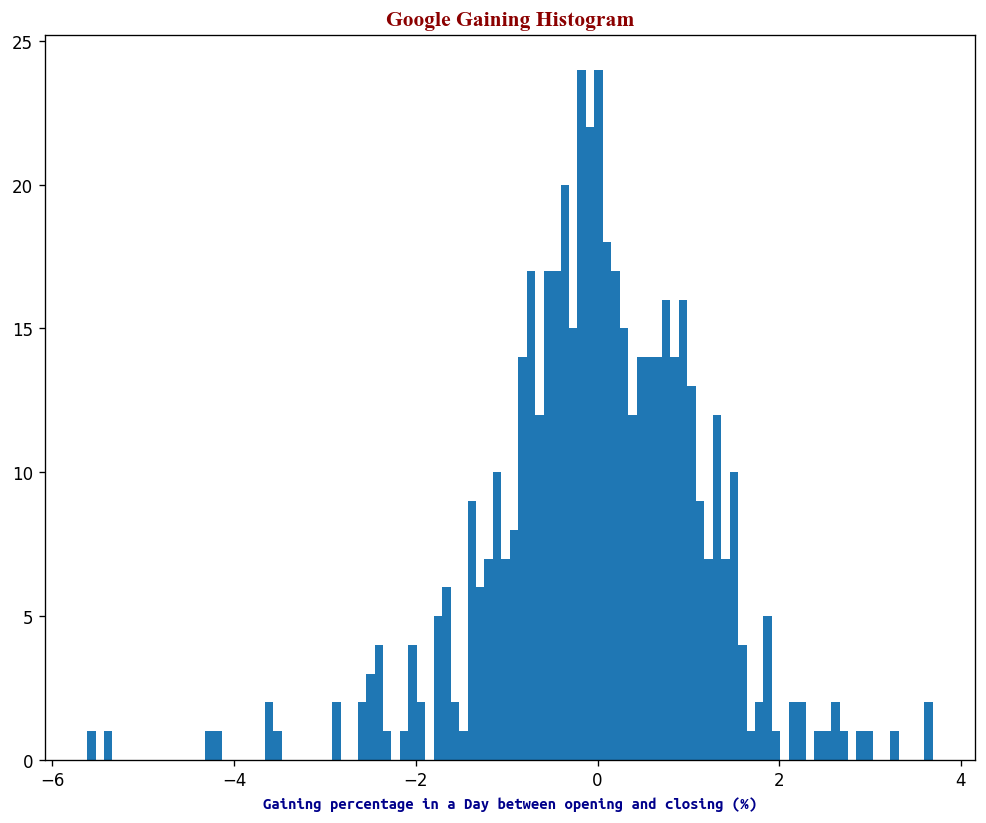

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# read the google stock data
df = pd.read_csv('GOOG.csv')

# store the opening and closing values for each day
opens = df.loc[:,'Open']
closes = df.loc[:,'Close']

# compute the daily gaining between opening and closing time of stock market
gainings = (closes-opens)/opens * 100 

# draw the histogram of the gaining distribution
plt.figure(figsize=(10,8), dpi=120)
plt.title('Google Gaining Histogram', fontdict= title_font)
plt.xlabel('Gaining percentage in a Day between opening and closing (%)', fontdict= axis_font)
plt.hist(gainings,100)
plt.show()